# Lab4

## import libs and connect to database

In [3]:
import pandas 
import configparser
import psycopg2

In [94]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [95]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                        )

In [96]:
cur = conn.cursor()

## Q1

In [7]:
sql_q1="""
        select * from gp15.student
        """

In [8]:
df= pandas.read_sql_query(sql_q1, conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,S1,IA
1,s2@jmu.edu,S2,IA
2,s3@jmu.edu,S3,IA
3,s4@jmu.edu,S4,IA
4,s5@jmu.edu,s5,GS
5,s56@jmu.edu,s6,GS


## Q2

In [13]:
sql_q2= """
        select gp15.professor.p_name, 
        gp15.course.c_name
        from gp15.professor
        inner join gp15.course
        on gp15.professor.p_email = gp15.course.p_email
        
        """

In [14]:
df= pandas.read_sql_query(sql_q2, conn)
df[:]

,p_name,c_name
0,Ron Raab,WMD
1,Kathleen Moore,Tech Apps
2,new_p,new_c_name
3,new_p,Data Mining
4,new_p,Machine Learning


## Q3

In [17]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled 
        from gp15.enroll_list
        group by c_number
        order by enrolled desc
        """

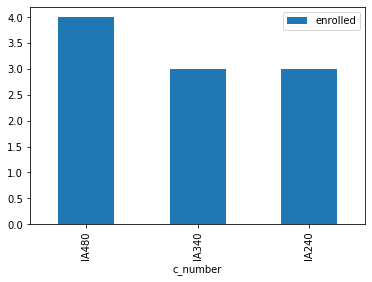

In [19]:
df= pandas.read_sql_query(sql_q3, conn)
df.plot.bar(y='enrolled', x='c_number')

## Q4

In [20]:
sql_q4= """
        select gp15.professor.p_name, 
        count(gp15.course.c_name) as teaching_number
        from gp15.professor
        inner join gp15.course
        on gp15.professor.p_email = gp15.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

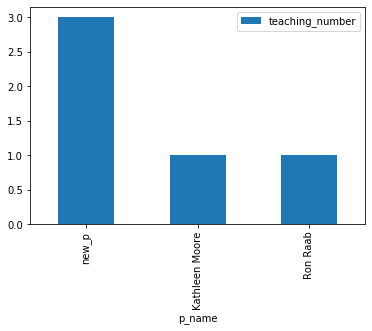

In [22]:
df= pandas.read_sql_query(sql_q4, conn)
df.plot.bar(y='teaching_number', x='p_name')

## Q5

In [85]:
sql_q5_professor = """
                    insert into gp15.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new_pr@jmu.edu', 'new_p','p_office')

In [86]:
cur.execute(sql_q5_professor)

In [87]:
conn.commit()

In [89]:
df= pandas.read_sql_query('select * from gp15.professor',conn)
df[:]

,p_email,p_name,office
0,moore8ka@jmu.edu,Kathleen Moore,ISAT116
1,hendrix@jmu.edu,Noel Hendrickson,N/A
2,raabrw@jmu.edu,Ron Raab,ISAT156
3,new_p@jmu.edu,new_p,new_office
4,new_pr@jmu.edu,new_p,p_office


In [97]:
sql_q5_course = """
                    insert into gp15.course(c_number,c_name,room,p_email)
                    values('{}','{}','{}','{}')
                    """.format('new_ia', 'new_c_name','online','new_p@jmu.edu')

In [98]:
cur.execute(sql_q5_course)

In [99]:
df= pandas.read_sql_query('select * from gp15.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA459,WMD,Online,raabrw@jmu.edu
1,IA240,Tech Apps,Online,moore8ka@jmu.edu
2,ia_new,new_c_name,online,new_p@jmu.edu
3,IA340,Data Mining,Online,new_p@jmu.edu
4,IA480,Machine Learning,Online,new_p@jmu.edu
5,new_ia,new_c_name,online,new_p@jmu.edu


## Q6

In [100]:
sql_q6_course = """
                update gp15.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [101]:
cur.execute(sql_q6_course)

In [102]:
conn.commit()

In [103]:
df= pandas.read_sql_query('select * from gp15.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA459,WMD,Online,raabrw@jmu.edu
1,IA240,Tech Apps,Online,moore8ka@jmu.edu
2,ia_new,new_c_name,online,new_p@jmu.edu
3,IA340,Data Mining,Online,new_p@jmu.edu
4,IA480,Machine Learning,Online,new_p@jmu.edu
5,new_ia,new_c_name,online,new_p@jmu.edu


In [104]:
sql_q6_professor = """
                delete from gp15.professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [106]:
cur.execute(sql_q6_professor)

In [107]:
conn.commit()

In [108]:
df= pandas.read_sql_query('select * from gp15.professor',conn)
df[:]

,p_email,p_name,office
0,moore8ka@jmu.edu,Kathleen Moore,ISAT116
1,hendrix@jmu.edu,Noel Hendrickson,N/A
2,raabrw@jmu.edu,Ron Raab,ISAT156
3,new_p@jmu.edu,new_p,new_office
4,new_pr@jmu.edu,new_p,p_office


## close connection

In [109]:
cur.close()
conn.close()